### Replace the code of Support Vector Machines method example of CSCE 5200 course Chapter 4. Use the original input data simulating frequencies of occurrence of terms in some source (replace data and extend its dimensionality in the Table 2.1 of Chapter 2). Execute the code in Python programming language (Java/C/C++/Matlab or other programming language can be also used if it is more convenient for you). Describe the problem statement, input data, method, code and results obtained. Upload the file consisting of the code and related report to the UNT Canvas environment.

### In simple words, please code an approach different from the SVM code provided in canvas.

### Background:
    
Support Vector Machine or SVM is a supervised machine learning algorithm used 
for both classification and regression. 

The objective of SVM algorithm is to find a hyperplane in an N-dimensional space 
that distinctly classifies the data points. 

### An SVM is a kind of large-margin classifier.

It is a vector space based machine learning method where the goal is to find a decision boundary between two classes 
that is maximally far from any point in the training data (possibly discounting some points as outliers or noise). 

### Dimension of SVM
    
• The dimension of the hyperplane depends upon the number of features.  

• If the number of input features is two, then the hyperplane is just a line.  

• If the number of input features is three, then the hyperplane becomes a 2-D plane. 

• It becomes difficult to imagine when the number of features exceeds three.  

In [153]:
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  


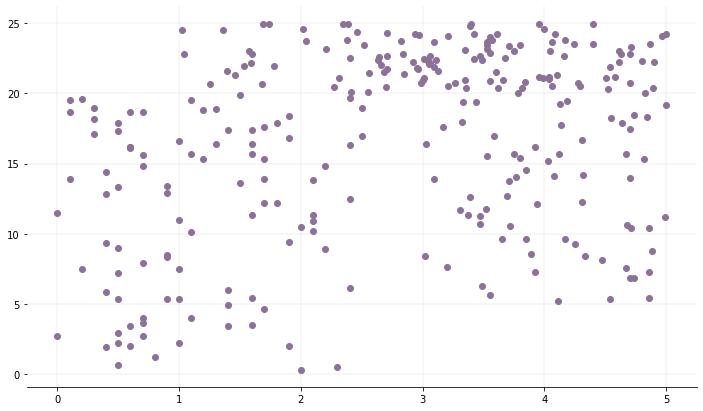

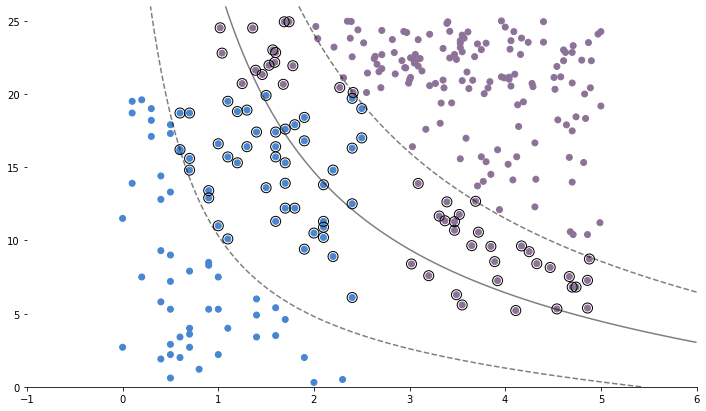

2nd degree  polynomial Kernel
Accuracy  (normalized): 0.9


In [154]:
def generate_random_dataset(size): 
    x = [] 
    y = [] 
    target = [] 
    for i in range(size): 
        x.append(np.round(random.uniform(0, 2.5), 1)) 
        y.append(np.round(random.uniform(0, 20), 1)) 
        target.append(0) 
        
        # class one 
        x.append(np.round(random.uniform(1, 5), 2)) 
        y.append(np.round(random.uniform(20, 25), 2)) 
        target.append(1) 

        x.append(np.round(random.uniform(3, 5), 2)) 
        y.append(np.round(random.uniform(5, 25), 2)) 
        target.append(1) 
        
        df_x = pd.DataFrame(data=x) 
        df_y = pd.DataFrame(data=y) 
        df_target = pd.DataFrame(data=target) 
        data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1) 
        data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1) 
        data_frame.columns = ['x', 'y', 'target'] 
    return data_frame 

# Generate  dataset 
size = 100 
dataset = generate_random_dataset(size) 
features  = dataset[['x',  'y']] 
label = dataset['target'] 

# Hold out 20% of the dataset for training 
test_size  = int(np.round(size  * 0.2, 0))

# Split dataset into training and testing sets 
x_train = features[:-test_size].values 
y_train = label[:-test_size].values 
x_test = features[-test_size:].values 
y_test = label[-test_size:].values 

# Plotting the training set 
fig, ax = plt.subplots(figsize=(12, 7)) 

# removing to and right border 
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['right'].set_visible(False)

# adding major gridlines 
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5) 
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298") 

from sklearn import svm 
model = svm.SVC(kernel='poly', degree=2) 
model.fit(x_train, y_train) 
 
plt.show() 
 
fig, ax = plt.subplots(figsize=(12, 7)) 

# Removing to and right border 
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['right'].set_visible(False) 

# Create grid to evaluate model 
XX = np.linspace(-1, max(features['x']) + 1, len(x_train)) 
yy = np.linspace(0, max(features['y']) + 1, len(y_train)) 
YY, XX = np.meshgrid(yy, XX) 
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
train_size = len(features[:-test_size]['x']) 

# Assigning different colors to the classes 
colors = y_train 
colors = np.where(colors == 1, '#8C7298', '#4786D1') 

# Plot the dataset 
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors) 

# Get the separating  hyperplane 
Z = model.decision_function(xy).reshape(XX.shape) 

# Draw the decision boundary and margins 
ax.contour(XX, YY, Z, colors='k', levels=[-1,  0, 1], alpha=0.5, linestyles=['--',  '-', '--']) 

# Highlight support vectors  with a circle around them 
ax.scatter(model.support_vectors_[:,  0], model.support_vectors_[:,  1], s=100, linewidth=1, facecolors='none',  edgecolors='k') 
plt.show() 
 
from sklearn.metrics  import accuracy_score 
predictions_poly  = model.predict(x_test) 
accuracy_poly = accuracy_score(y_test,  predictions_poly) 
print("2nd degree  polynomial Kernel\nAccuracy  (normalized): " + str(accuracy_poly)) 


##  Modifiying the approach using table 2.1 datasets

### The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.

In [155]:
# LSVM - Linear Support Vector Machine
# import and read the dataset and specify the input and target

import pandas as pd
import numpy as np
dataset = pd.read_csv(r'/Users/roja/Downloads/frequency_table_data.csv')

dataset.shape

x = dataset['Frequency']
y = dataset['Rank']
    

In [156]:
# displaying the spreadsheet, dataset taken from table 2.1 from chapter 2

dataset

,Token,Frequency,Rank
0,of,17523,11
1,a,14914,12
2,you,14088,13
3,my,12287,14
4,that,11192,15
5,in,11106,16
6,is,9344,17
7,not,8506,18
8,it,7799,19
9,me,7753,20


In [157]:
# features as input

x

0     17523
1     14914
2     14088
3     12287
4     11192
5     11106
6      9344
7      8506
8      7799
9      7753
10    28317
11    26022
12    22639
13    19898
Name: Frequency, dtype: int64

In [158]:
# have the target

y

0     11
1     12
2     13
3     14
4     15
5     16
6     17
7     18
8     19
9     20
10     7
11     8
12     9
13    10
Name: Rank, dtype: int64

In [159]:
# split the dataset into train and test using sklearn before building SVM algorithm model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [160]:
# import classifier or SVC function from sklearn module, build a vector machine model

from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear')
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
svcclassifier.fit(x_train, y_train)

# predict the values using the SVM algorithm model

y_pred = svcclassifier.predict(x_test)

# evaluate the SVM model

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
              precision    recall  f1-score   support

          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/

In [161]:
# Implementing Kernel SVM with Sklearn SVM module
# Polynomial SVM Kernel
# Importing SVC function and setting kernel as 'poly'

from sklearn.svm import SVC
svclassifier1 = SVC(kernel = 'poly', degree=2)
svclassifier1.fit(x_train, y_train)

# making predictions

y_pred1 = svclassifier1.predict(x_test) 

# evaluating the model

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
              precision    recall  f1-score   support

          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/roja/opt/anaconda3/lib/

## Conclusion: Therefore, we learnt how to build support vector machine models with the help of the support vector classifier function. Also, we talked about kernel SVM implementation in Python and Sklearn, which is a very useful method while dealing with non-linearly separable datasets.

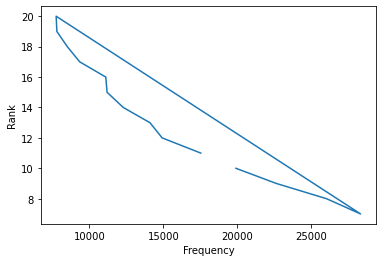

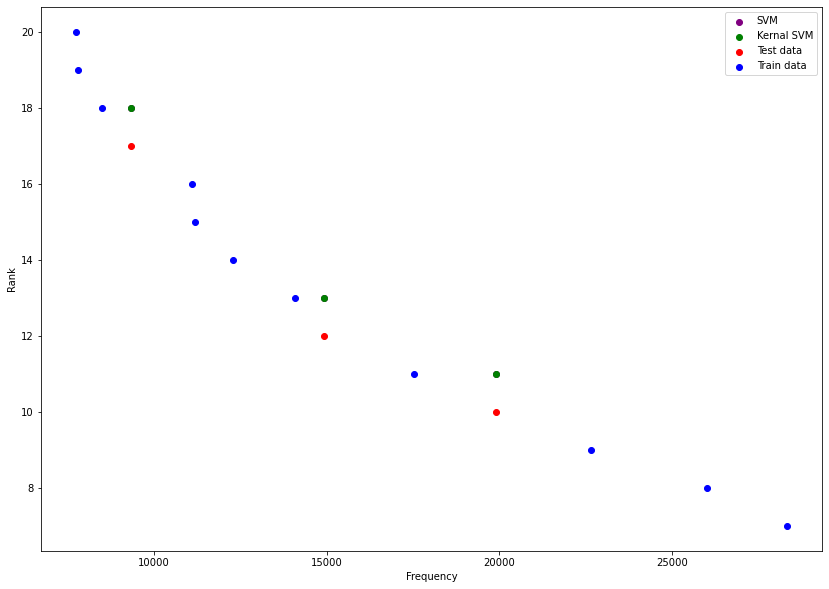

In [162]:
from matplotlib import pyplot as plt
from sklearn import svm 

model = svm.SVC(kernel='poly', degree=8) 
model.fit(x_train, y_train) 

plt.plot(x, y)
plt.xlabel("Frequency")
plt.ylabel("Rank")
plt.show() 
 
fig, ax = plt.subplots(figsize=(14, 10)) 

ax.set_xlabel('Frequency')
ax.set_ylabel('Rank')
# Plot the dataset 
ax.scatter(x_test, y_pred, c = 'purple', cmap = 'winter', label="SVM")
ax.scatter(x_test, y_pred1, c = 'green', cmap = 'winter', label="Kernal SVM")

ax.scatter(x_test, y_test, c = 'red', cmap = 'winter', label="Test data")
ax.scatter(x_train, y_train, c = 'blue', cmap = 'winter', label="Train data")

ax.legend()